# Analisis encuestas Coomproriente

In [1]:
# Importacion de las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Consumidores
| Código | Tipo | Pregunta | Respuestas / Escala |
|--------|------|----------|---------------------|
| C1 | Demográfica | ¿Con qué frecuencia compras productos agrícolas directamente al Centro de Abastos? | 1=Nunca, 2=Rara vez, 3=Ocasionalmente, 4=Frecuentemente, 5=Siempre |
| C2 | Cerrada | ¿Conoces la página de Coomproriente donde solo se publican los precios agrícolas? | 1=Sí, 2=No |
| C3 | Cerrada | Si respondiste "Sí" en C2: ¿Con qué frecuencia consultas esos reportes de precio? | 1=Nunca, 2=Una vez al año, 3=Varias veces al año, 4=Una vez al mes, 5=Semanal |
| C4 | Likert | ¿Qué tan fácil te resulta encontrar los precios que buscas en esos reportes? | 1=Muy difícil → 5=Muy fácil |
| C5 | Likert | ¿Qué tan completa encuentras la información de cantidades y unidades (Kg, bulto, caja)? | 1=Muy incompleta → 5=Muy completa |
| C6 | Likert | ¿Qué tan claro está el formato de presentación de los datos (tabla, fecha, origen)? | 1=Muy confuso → 5=Muy claro |
| C7 | Likert | ¿Qué tan satisfecho(a) estás con la actualización y puntualidad de los precios publicados? | 1=Muy insatisfecho → 5=Muy satisfecho |
| C8 | Cerrada | En tu opinión, ¿sería útil poder **pedir y pagar** productos directamente desde la web? | 1=Nada útil, 2=Poco útil, 3=Medianamente útil, 4=Útil, 5=Muy útil |
| C9 | Likert | ¿Qué tan cómodo te sentirías usando un carrito de compras y métodos de pago en línea? | 1=Muy incómodo → 5=Muy cómodo |
| C10 | Abierta | ¿Qué funcionalidades añadirías para que la web te facilite la compra (p.ej. filtro de productos, chat, seguimiento de pedido)? | Respuesta libre |

In [2]:
df_con = pd.read_csv('../respuestas-cuestionario-consumidor.csv', quotechar='"', skipinitialspace=True, engine='python')
df_con.columns = ['Nombre', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7','C8','C9', 'Comentario']
df_con.head()

,Nombre,C1,C2,C3,C4,C5,C6,C7,C8,C9,Comentario
0,Ana Rodríguez,4,1,4,4,4,4,4,5,5,Me gustaría un sistema de búsqueda por tipo de...
1,Carlos Pérez,3,2,-,-,-,-,-,4,4,Sería útil tener un chat en línea para consultas.
2,María Gómez,5,1,5,5,5,5,5,5,5,Una sección de productos destacados ayudaría a...
3,Juan Martínez,2,2,-,-,-,-,-,3,3,Opciones de pago seguras y confiables son esen...
4,Laura Sánchez,4,1,3,3,3,3,3,4,4,Información sobre la procedencia de los produc...


#### C1.¿Con qué frecuencia compras productos agrícolas directamente al Centro de Abastos?

In [3]:
C1_dict = {
    1: 'Nunca',
    2: 'Rara vez',
    3: 'Ocasionalmente',
    4: 'Frecuentemente',
    5: 'Siempre'
}
df_con['C1'] = df_con['C1'].map(C1_dict)
df_con['C1'].value_counts()

C1
Frecuentemente    12
Siempre           11
Ocasionalmente    10
Rara vez          10
Nunca              6
Name: count, dtype: int64

Text(0.5, 0, 'Conocimiento de la página')

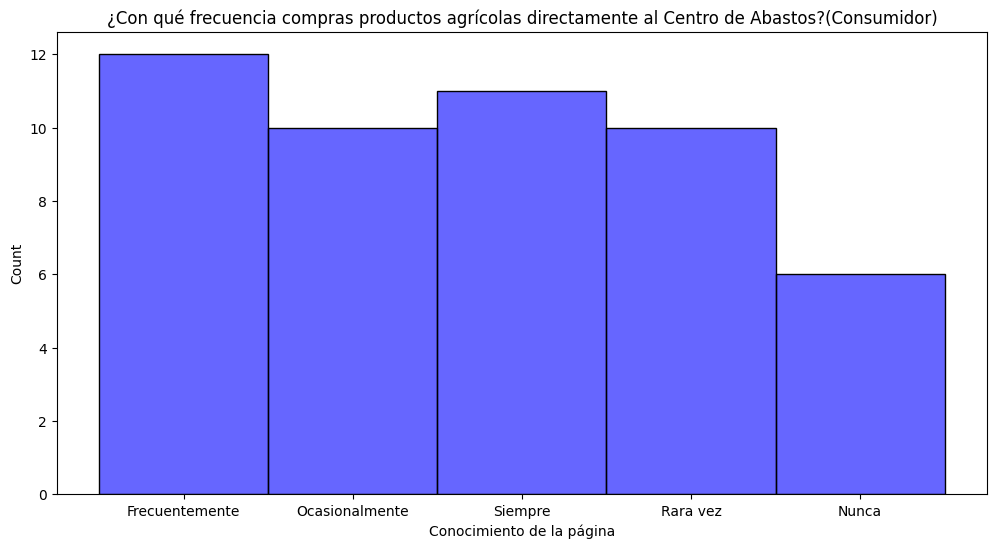

In [4]:
# Graficar la cantidad de respuestas por cada pregunta
plt.figure(figsize=(12, 6))
sns.histplot(df_con['C1'], bins=10, color='blue', alpha=0.6)
plt.title('¿Con qué frecuencia compras productos agrícolas directamente al Centro de Abastos?(Consumidor)')
plt.xlabel('Conocimiento de la página')

#### C2.¿Conoces la página de Coomproriente donde solo se publican los precios agrícolas?

In [5]:
C2_dict = {
    1: 'Si',
    2: 'No',
}
df_con['C2'] = df_con['C2'].map(C2_dict)
df_con['C2'].value_counts()

C2
Si    33
No    16
Name: count, dtype: int64

Text(0.5, 0, 'Respuesta')

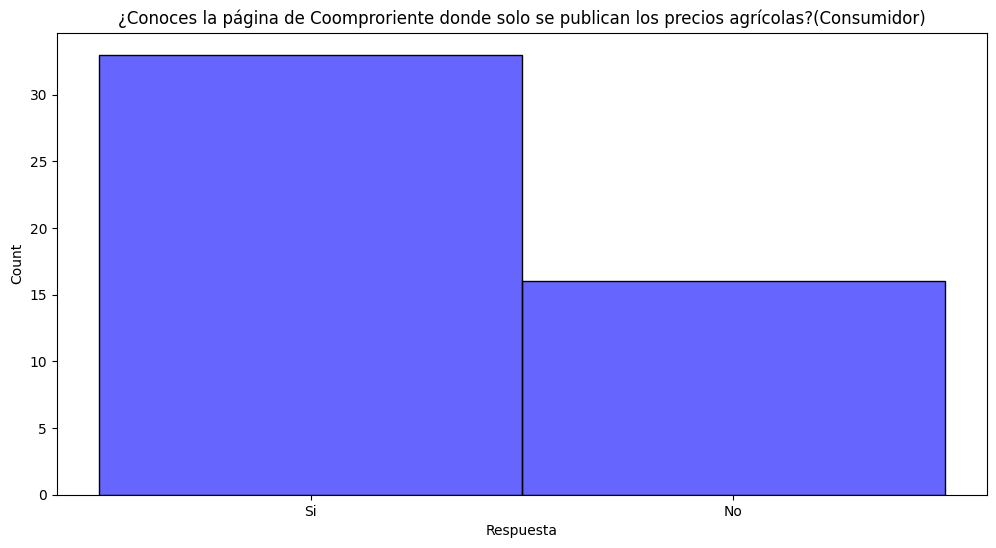

In [6]:
# Graficar la cantidad de respuestas por cada pregunta
plt.figure(figsize=(12, 6))
sns.histplot(df_con['C2'], bins=10, color='blue', alpha=0.6)
plt.title('¿Conoces la página de Coomproriente donde solo se publican los precios agrícolas?(Consumidor)')
plt.xlabel('Respuesta')

#### C3.¿Con qué frecuencia consultas esos reportes de precio?

In [7]:
# Filtrar las respuestas de la pregunta C3
df_con_vdf = df_con[df_con['C2'] == 'Si']
df_con_vdf['C3'].info()

<class 'pandas.core.series.Series'>
Index: 33 entries, 0 to 48
Series name: C3
Non-Null Count  Dtype 
--------------  ----- 
33 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes


In [8]:
# Diccionario para mapear las respuestas de C3
C3_dict = {
    '1': 'Nunca',
    '2': 'Una vez al año',
    '3': 'Varias veces al año',
    '4': 'Una vez al mes',
    '5': 'Semanal'
}

# Aplicar el mapeo
df_con_vdf['C3'] = df_con_vdf['C3'].map(C3_dict)
df_con_vdf['C3'].value_counts()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\3234023795.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_vdf['C3'] = df_con_vdf['C3'].map(C3_dict)


C3
Varias veces al año    10
Una vez al mes          8
Semanal                 6
Una vez al año          6
Nunca                   3
Name: count, dtype: int64

Text(0.5, 0, 'Respuesta')

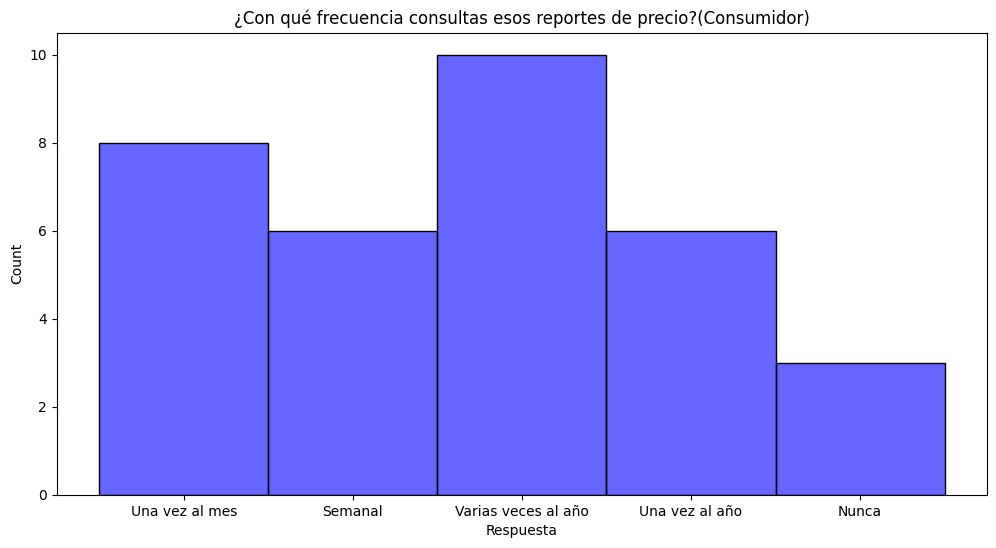

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df_con_vdf['C3'], bins=10, color='blue', alpha=0.6)
plt.title('¿Con qué frecuencia consultas esos reportes de precio?(Consumidor)')
plt.xlabel('Respuesta')

In [10]:
df_con['C4'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 49 entries, 0 to 48
Series name: C4
Non-Null Count  Dtype 
--------------  ----- 
49 non-null     object
dtypes: object(1)
memory usage: 524.0+ bytes


#### C4.¿Qué tan fácil te resulta encontrar los precios que buscas en esos reportes?

In [11]:
C4_dict = {
    '1': 'Muy difícil',
    '2': 'Difícil',
    '3': 'Neutral',
    '4': 'Fácil',
    '5': 'Muy fácil'
}
df_con_vdf['C4'] = df_con['C4'].map(C4_dict)
df_con_vdf['C4'].value_counts()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\3987615763.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_vdf['C4'] = df_con['C4'].map(C4_dict)


C4
Fácil          11
Neutral        11
Difícil         6
Muy fácil       4
Muy difícil     1
Name: count, dtype: int64

Text(0.5, 0, 'Respuesta')

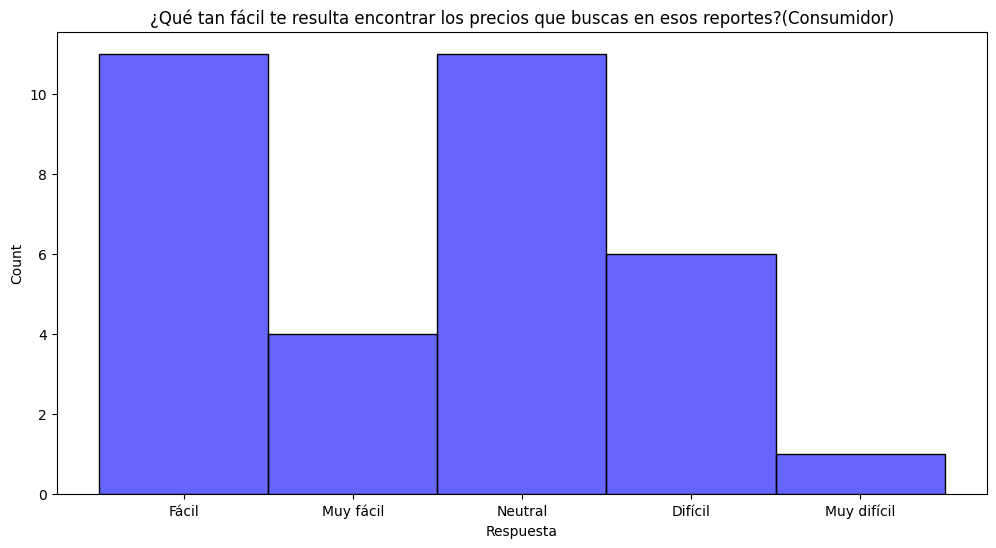

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(df_con_vdf['C4'], bins=10, color='blue', alpha=0.6)
plt.title('¿Qué tan fácil te resulta encontrar los precios que buscas en esos reportes?(Consumidor)')
plt.xlabel('Respuesta')

#### C5.¿Qué tan completa encuentras la información de cantidades y unidades (Kg, bulto, caja)?

In [13]:
C5_dict = {
    '1': 'Muy incompleta',
    '2': 'Incompleta',
    '3': 'Neutral',
    '4': 'Completa',
    '5': 'Muy completa'
}
df_con_vdf['C5'] = df_con['C5'].map(C5_dict)
df_con_vdf['C5'].value_counts()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\342806262.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_vdf['C5'] = df_con['C5'].map(C5_dict)


C5
Neutral           11
Incompleta        10
Completa           8
Muy completa       3
Muy incompleta     1
Name: count, dtype: int64

Text(0.5, 0, 'Respuesta')

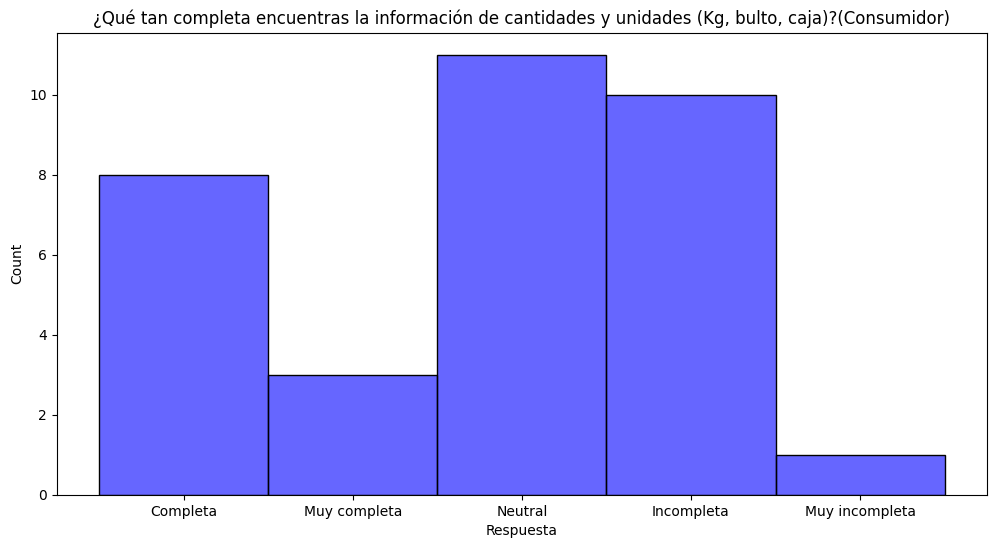

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df_con_vdf['C5'], bins=10, color='blue', alpha=0.6,stat='count')
plt.title('¿Qué tan completa encuentras la información de cantidades y unidades (Kg, bulto, caja)?(Consumidor)')
plt.xlabel('Respuesta')

#### C6.¿Qué tan claro está el formato de presentación de los datos (tabla, fecha, origen)? 

In [15]:
C6_dict = {
    '1': 'Muy confuso',
    '2': 'Confuso',
    '3': 'Neutral',
    '4': 'Claro',
    '5': 'Muy claro'
}
df_con_vdf['C6'] = df_con['C6'].map(C6_dict)
df_con_vdf['C6'].value_counts()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\218241750.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_vdf['C6'] = df_con['C6'].map(C6_dict)


C6
Neutral        14
Claro           9
Confuso         5
Muy claro       3
Muy confuso     2
Name: count, dtype: int64

Text(0.5, 0, 'Respuesta')

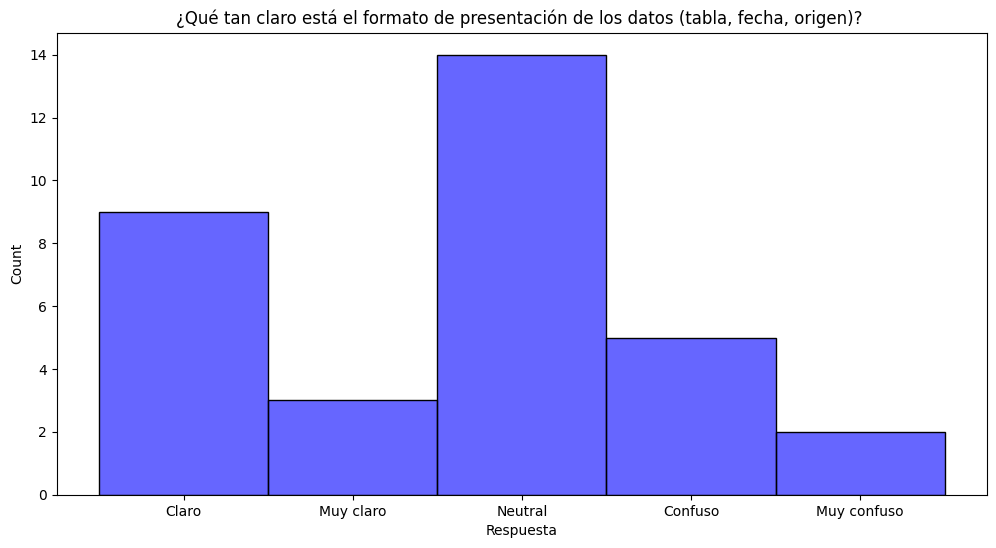

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df_con_vdf['C6'], bins=10, color='blue', alpha=0.6,stat='count')
plt.title('¿Qué tan claro está el formato de presentación de los datos (tabla, fecha, origen)? ')
plt.xlabel('Respuesta')

#### C7.¿Qué tan satisfecho(a) estás con la actualización y puntualidad de los precios publicados?

In [17]:
C7_dict = {
    '1': 'Muy insatisfecho',
    '2': 'Insatisfecho',
    '3': 'Neutral',
    '4': 'Satisfecho',
    '5': 'Muy satisfecho'
}
df_con_vdf['C7'] = df_con['C7'].map(C7_dict)
df_con_vdf['C7'].value_counts()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\618354825.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_vdf['C7'] = df_con['C7'].map(C7_dict)


C7
Neutral             9
Insatisfecho        9
Satisfecho          8
Muy insatisfecho    4
Muy satisfecho      3
Name: count, dtype: int64

Text(0.5, 0, 'Respuesta')

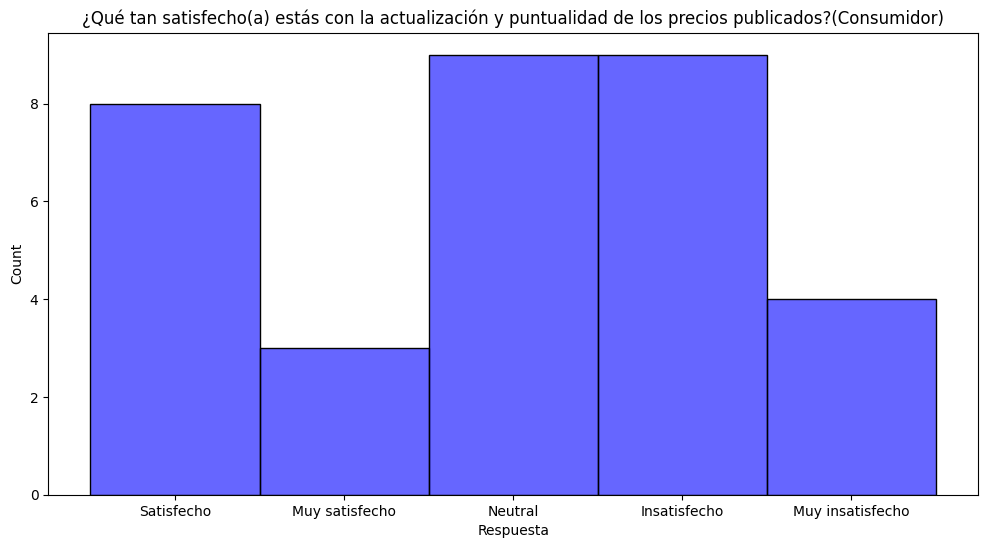

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df_con_vdf['C7'], bins=10, color='blue', alpha=0.6,stat='count')
plt.title('¿Qué tan satisfecho(a) estás con la actualización y puntualidad de los precios publicados?(Consumidor)')
plt.xlabel('Respuesta')

#### C8.¿sería útil poder **pedir y pagar** productos directamente desde la web? 

In [19]:
C8_dict = {
    1: 'Nada útil',
    2: 'Poco útil',
    3: 'Medianamente útil',
    4: 'Útil',
    5: 'Muy útil'
}

df_con_vdf['C8'] = df_con_vdf['C8'].map(C8_dict)
df_con_vdf['C8'].value_counts()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\3220268030.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_vdf['C8'] = df_con_vdf['C8'].map(C8_dict)


C8
Muy útil             15
Útil                 12
Medianamente útil     4
Poco útil             2
Name: count, dtype: int64

Text(0.5, 0, 'Respuesta')

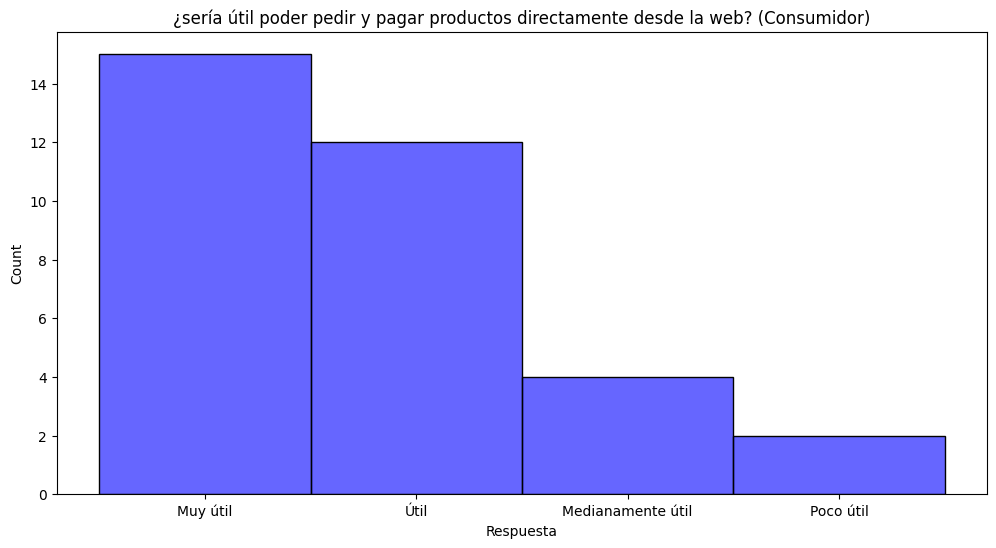

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(df_con_vdf['C8'], bins=10, color='blue', alpha=0.6,stat='count')
plt.title('¿sería útil poder pedir y pagar productos directamente desde la web? (Consumidor)')
plt.xlabel('Respuesta')

#### C9.¿Qué tan cómodo te sentirías usando un carrito de compras y métodos de pago en línea?

In [21]:
C9_dict = {
    1: 'Muy incómodo',
    2: 'Incómodo',
    3: 'Neutral',
    4: 'Cómodo',
    5: 'Muy cómodo'
}

df_con_vdf['C9'] = df_con_vdf['C9'].map(C9_dict)
df_con_vdf['C9'].value_counts()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\2439455832.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_vdf['C9'] = df_con_vdf['C9'].map(C9_dict)


C9
Muy cómodo      12
Cómodo          10
Neutral          8
Muy incómodo     2
Incómodo         1
Name: count, dtype: int64

Text(0.5, 0, 'Respuesta')

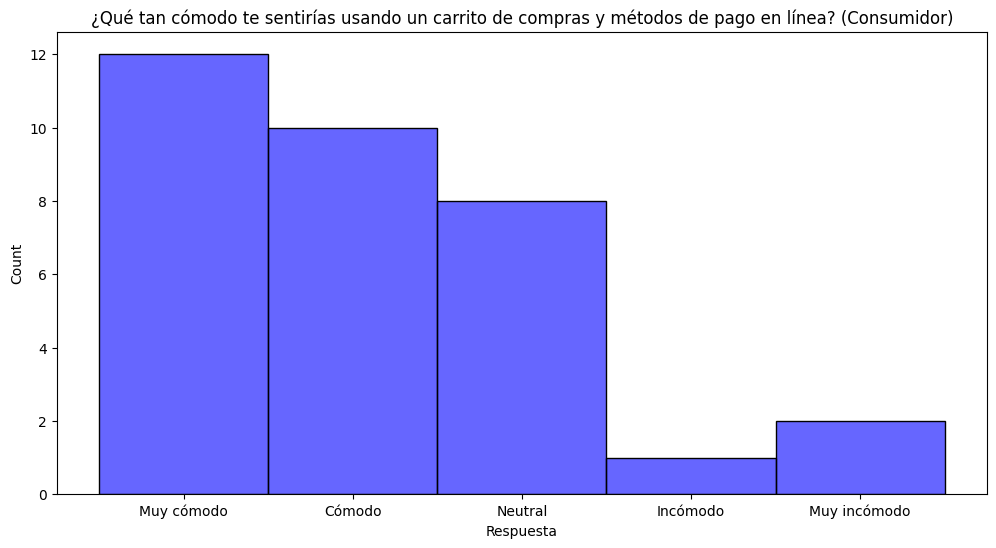

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df_con_vdf['C9'], bins=10, color='blue', alpha=0.6,stat='count')
plt.title('¿Qué tan cómodo te sentirías usando un carrito de compras y métodos de pago en línea? (Consumidor)')
plt.xlabel('Respuesta')

In [23]:
df_con_vdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 48
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Nombre      33 non-null     object
 1   C1          33 non-null     object
 2   C2          33 non-null     object
 3   C3          33 non-null     object
 4   C4          33 non-null     object
 5   C5          33 non-null     object
 6   C6          33 non-null     object
 7   C7          33 non-null     object
 8   C8          33 non-null     object
 9   C9          33 non-null     object
 10  Comentario  33 non-null     object
dtypes: object(11)
memory usage: 3.1+ KB


#### C10.¿Qué funcionalidades añadirías para que la web te facilite la compra (p.ej. filtro de productos, chat, seguimiento de pedido)? 

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\2148887479.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x='count', y='word', palette='mako')


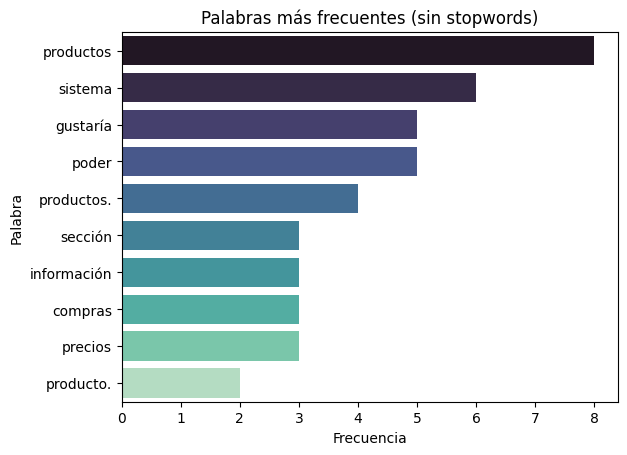

In [24]:
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Texto de tu columna
text = ' '.join(df_con_vdf['Comentario']).lower()

# Lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

# Filtrar palabras
words = [word for word in text.split() if word not in stop_words]

# Contar frecuencia
counts = Counter(words)
top_words = pd.DataFrame(counts.most_common(10), columns=['word', 'count'])

# Gráfico
sns.barplot(data=top_words, x='count', y='word', palette='mako')
plt.title("Palabras más frecuentes (sin stopwords)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()


In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


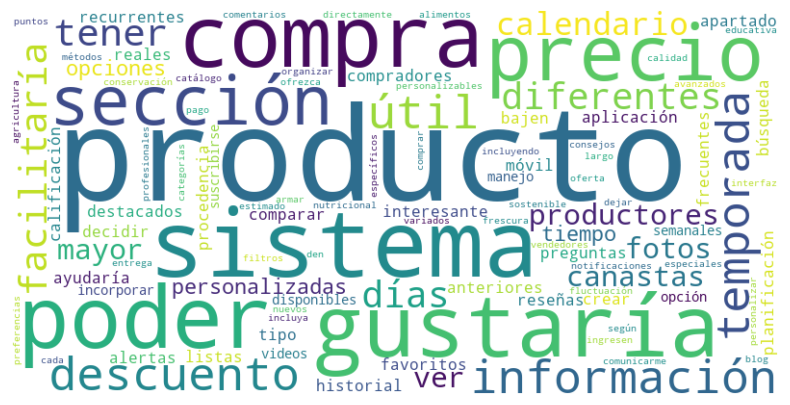

In [26]:
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Texto de tu columna
text = ' '.join(df_con_vdf['Comentario']).lower()

# Lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

# Filtrar palabras
words = [word for word in text.split() if word not in stop_words]

# Contar frecuencia
counts = Counter(words)
top_words = pd.DataFrame(counts.most_common(10), columns=['word', 'count'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



### 2.Transportistas
| Código | Tipo | Pregunta | Respuestas / Escala |
|--------|------|----------|---------------------|
| T1 | Demográfica | ¿Qué tipo de vehículo usas para transportar la mercancía? | a) Camión pequeño b) Camión mediano c) Camión grande |
| T2 | Cerrada | ¿Conoces el portal de precios de Coomproriente? | 1=Sí, 2=No |
| T3 | Cerrada | Si respondiste "Sí" en T2: ¿Lo consultas para planificar tus rutas o costos? | 1=Nunca, 2=Rara vez, 3=Ocasionalmente, 4=Frecuentemente, 5=Siempre |
| T4 | Likert | ¿Qué tan clara y suficiente encuentras la info de precios para tus cotizaciones? | 1=Muy insuficiente → 5=Muy suficiente |
| T5 | Cerrada | ¿Sueles requerir datos adicionales (peso, volumen, tiempos) que no aparecen en el reporte de precios? | 1=Sí, 2=No |
| T6 | Likert | ¿Qué tan importante sería para ti un módulo donde los comerciantes hagan pedidos y asignen rutas? | 1=Nada importante → 5=Muy importante |
| T7 | Cerrada | ¿Crees que un sistema en línea que integre pedidos y rutas te ahorraría llamadas o desplazamientos? | 1=Sí, 2=No |
| T8 | Abierta | ¿Qué datos adicionales o herramientas en la web te ayudarían a optimizar tu trabajo? | Respuesta libre |

In [27]:
import pandas as pd

# Leer el archivo CSV, que está en formato adecuado
df_trn = pd.read_csv('../respuestas-cuestionario-transportista.csv', quotechar='"', skipinitialspace=True)

# Separar la columna combinada que tiene todos los datos en una sola columna
df_trn = df_trn.iloc[:, 0].str.split(",", expand=True)

# Asignar los nombres de las columnas según el patrón que mencionaste
df_trn.columns = ['Nombre', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'Comentario']

# Convertir las columnas numéricas, manejando valores no numéricos
cols = ['T1', 'T2', 'T4', 'T5', 'T6', 'T7']
df_trn[cols] = df_trn[cols].apply(pd.to_numeric, errors='coerce')

# Mostrar las primeras filas para verificar que se haya procesado correctamente
df_trn.head()


,Nombre,T1,T2,T3,T4,T5,T6,T7,Comentario
0,Pedro López,NaN,1,4,4.0,1,5,1,"""Un mapa interactivo con rutas sugeridas sería..."
1,Sandra Ruiz,NaN,2,-,NaN,1,4,1,"""Información en tiempo real sobre la demanda d..."
2,Luis Fernández,NaN,1,5,5.0,1,5,1,"""Alertas de tráfico o condiciones climáticas e..."
3,Carolina Mendoza,NaN,2,-,NaN,2,3,2,"""Historial de entregas y tiempos promedio de e..."
4,Jorge Ramírez,NaN,1,3,3.0,2,4,1,"""Integración con aplicaciones de navegación GPS."""


In [28]:
df_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nombre      48 non-null     object 
 1   T1          0 non-null      float64
 2   T2          48 non-null     int64  
 3   T3          48 non-null     object 
 4   T4          27 non-null     float64
 5   T5          48 non-null     int64  
 6   T6          48 non-null     int64  
 7   T7          48 non-null     int64  
 8   Comentario  48 non-null     object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.5+ KB


In [29]:
# Filtrar con los que conocen la pagina
T2_dict={1:'Si', 2:'No'}
df_trn['T2'] = df_trn['T2'].map(T2_dict)
df_trn['T2'].value_counts()


T2
Si    27
No    21
Name: count, dtype: int64

Text(0.5, 0, 'Conocimiento de la página')

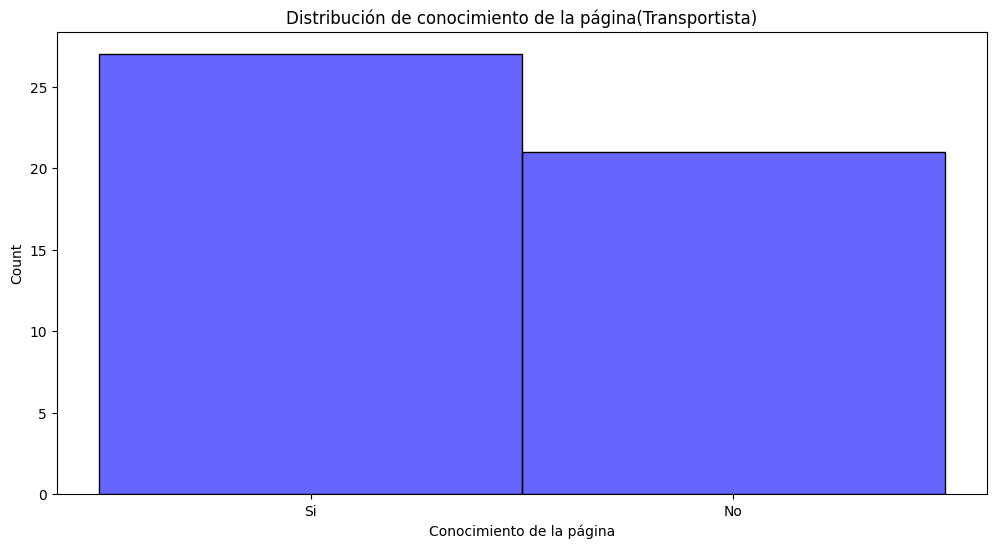

In [30]:
# Graficar la cantidad de respuestas por cada pregunta
plt.figure(figsize=(12, 6))
sns.histplot(df_trn['T2'], bins=10, color='blue', alpha=0.6)
plt.title('Distribución de conocimiento de la página(Transportista)')
plt.xlabel('Conocimiento de la página')

In [31]:
# Filtrar con los que conocen la pagina
df_trn_vd = df_trn[df_trn['T2'] == 'Si']

#### T3. Consulta para planificacion de costos y precios

In [32]:
T3_dict={ '2':'Rara vez', '3':'Ocasionalmente', '4':'Frecuentemente', '5':'Siempre'}
df_trn_vd['T3'] = df_trn_vd['T3'].map(T3_dict)
df_trn_vd['T3'].value_counts()


C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\3175133047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trn_vd['T3'] = df_trn_vd['T3'].map(T3_dict)


T3
Frecuentemente    8
Siempre           8
Ocasionalmente    7
Rara vez          4
Name: count, dtype: int64

Text(0.5, 0, 'Frecuencia de uso de la página para costos y rutas')

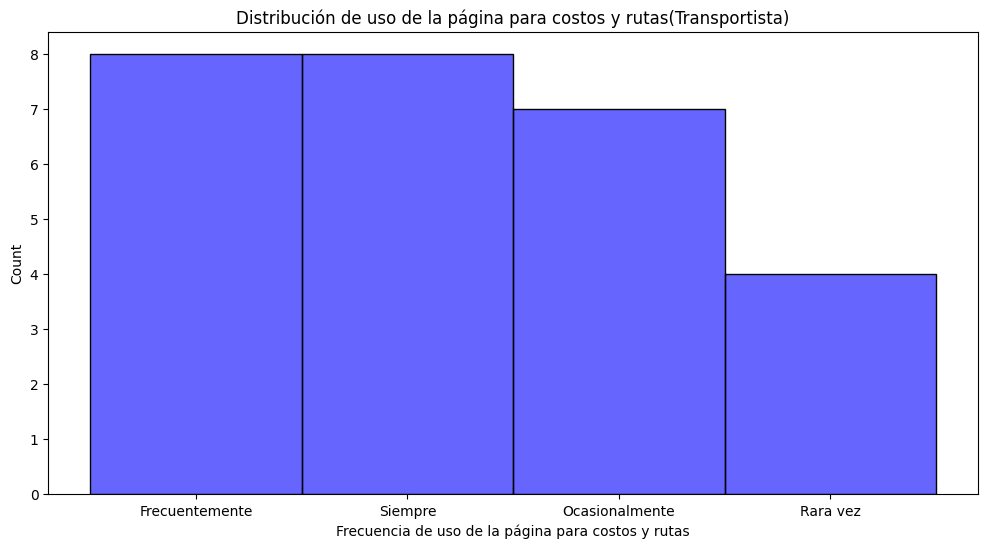

In [33]:
# Graficar la cantidad de respuestas por cada pregunta
plt.figure(figsize=(12, 6))
sns.histplot(df_trn_vd['T3'], bins=10, color='blue', alpha=0.6)
plt.title('Distribución de uso de la página para costos y rutas(Transportista)')
plt.xlabel('Frecuencia de uso de la página para costos y rutas')

#### T4. Claridad de costos para las cotizaciones

In [34]:
T4_dict={ 1:'Muy insuficiente', 2:'Insuficiente', 3:'Regular', 4:'Suficiente', 5:'Totalmente suficiente'}
df_trn_vd['T4'] = df_trn_vd['T4'].map(T4_dict)
df_trn_vd['T4'].value_counts()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\1022874276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trn_vd['T4'] = df_trn_vd['T4'].map(T4_dict)


T4
Regular                  10
Suficiente                8
Insuficiente              5
Totalmente suficiente     4
Name: count, dtype: int64

Text(0.5, 0, 'Sentimiento de claridad de costos para cotizaciones')

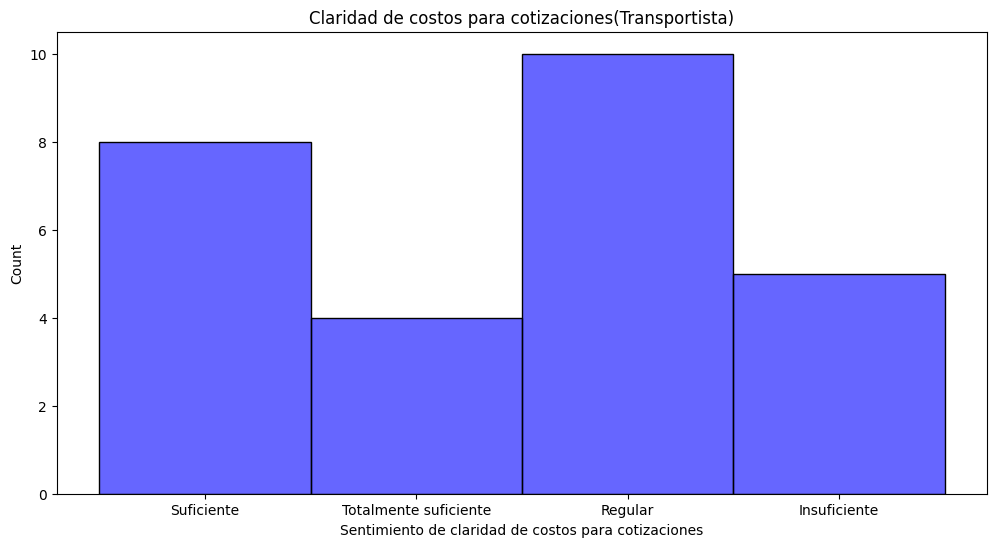

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(df_trn_vd['T4'], bins=10, color='blue', alpha=0.6,stat='count')
plt.title('Claridad de costos para cotizaciones(Transportista)')
plt.xlabel('Sentimiento de claridad de costos para cotizaciones')

#### T5. Sueles requerir datos adiccionales que no aparecen en el reporte de precios

In [36]:
T5_dict={1:'Sí', 2:'No'}
df_trn_vd['T5'] = df_trn_vd['T5'].map(T5_dict)
df_trn_vd['T5'].value_counts()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\1381539842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trn_vd['T5'] = df_trn_vd['T5'].map(T5_dict)


T5
Sí    19
No     8
Name: count, dtype: int64

Text(0.5, 0, 'Respuesta')

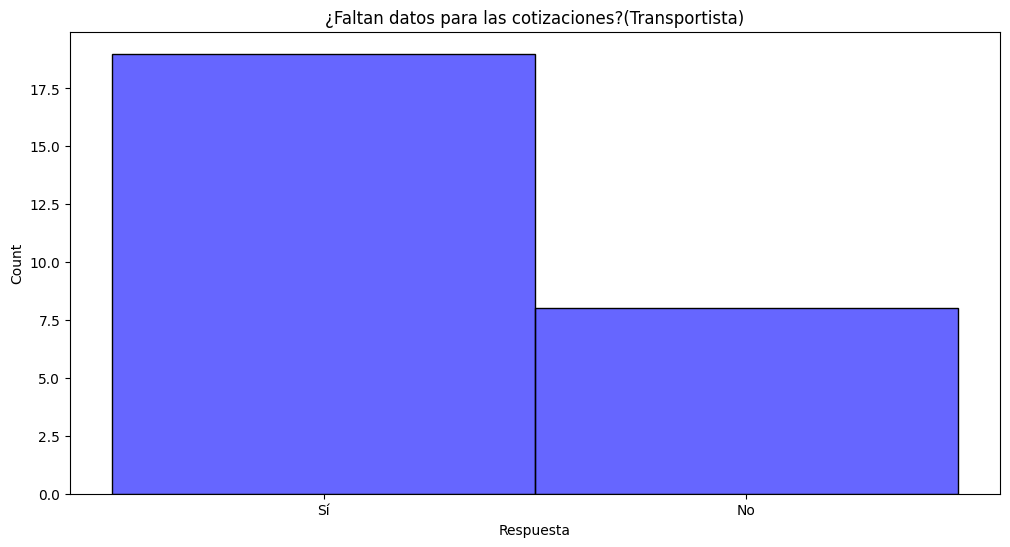

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(df_trn_vd['T5'], bins=10, color='blue', alpha=0.6,stat='count')
plt.title('¿Faltan datos para las cotizaciones?(Transportista)')
plt.xlabel('Respuesta')

#### T6.¿Qué tan importante sería para ti un módulo donde los comerciantes hagan pedidos y asignen rutas? 

In [38]:
T6_dict = {1: 'Nada importante', 2: 'Poco importante', 3: 'Moderadamente importante', 4: 'Importante', 5: 'Muy importante'}
df_trn_vd['T6'] = df_trn_vd['T6'].map(T6_dict)
df_trn_vd['T6'].value_counts()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\2972466116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trn_vd['T6'] = df_trn_vd['T6'].map(T6_dict)


T6
Muy importante              16
Importante                   7
Moderadamente importante     4
Name: count, dtype: int64

Text(0.5, 0, 'Respuesta')

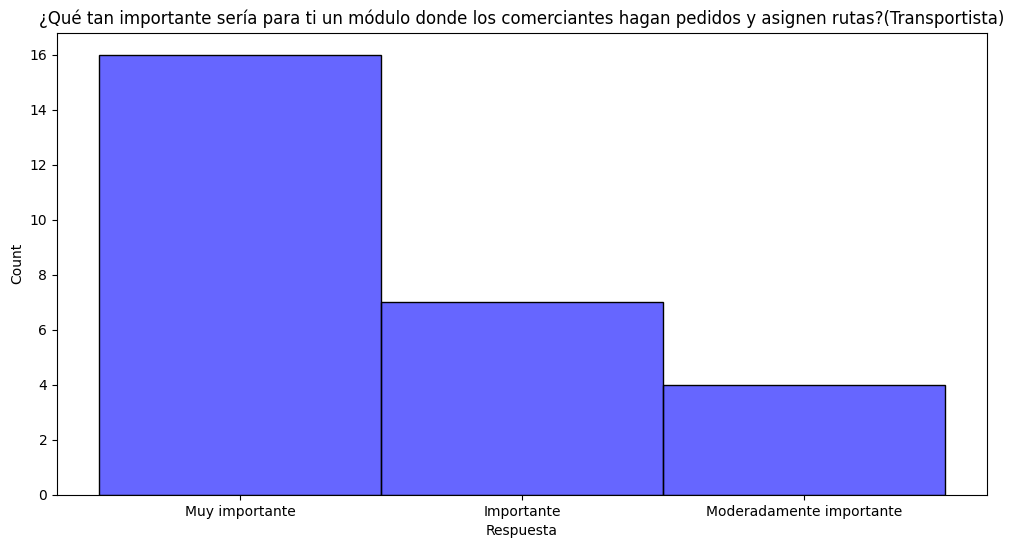

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(df_trn_vd['T6'], bins=10, color='blue', alpha=0.6,stat='count')
plt.title('¿Qué tan importante sería para ti un módulo donde los comerciantes hagan pedidos y asignen rutas?(Transportista)')
plt.xlabel('Respuesta')

#### T7.¿Crees que un sistema en línea que integre pedidos y rutas te ahorraría llamadas o desplazamientos? 

In [40]:
T7_dict = {1: 'Si', 2: 'No'}
df_trn_vd['T7'] = df_trn_vd['T7'].map(T7_dict)
df_trn_vd['T7'].value_counts()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\2377466151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trn_vd['T7'] = df_trn_vd['T7'].map(T7_dict)


T7
Si    23
No     4
Name: count, dtype: int64

Text(0.5, 0, 'Respuesta')

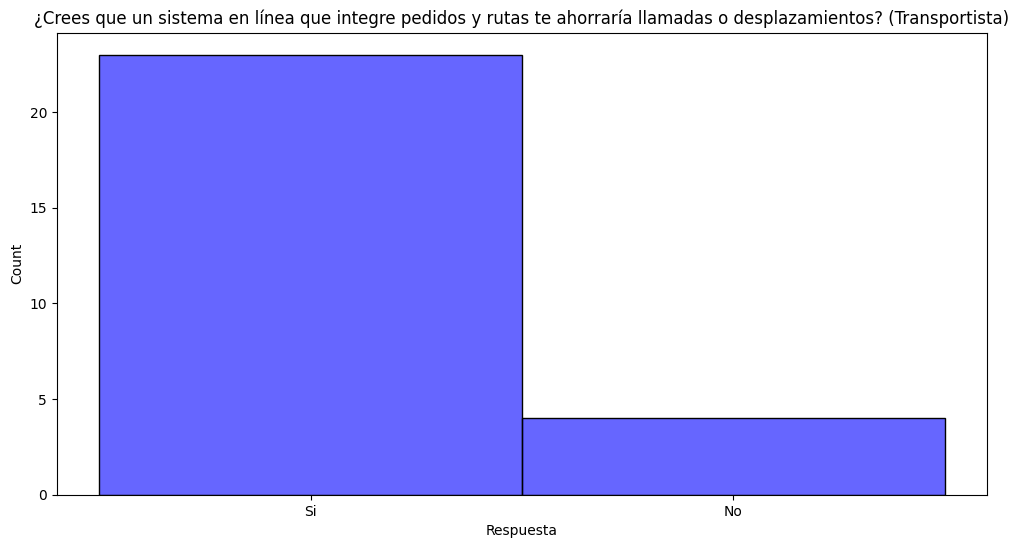

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(df_trn_vd['T7'], bins=10, color='blue', alpha=0.6,stat='count')
plt.title('¿Crees que un sistema en línea que integre pedidos y rutas te ahorraría llamadas o desplazamientos? (Transportista)')
plt.xlabel('Respuesta')

#### T8.¿Qué datos adicionales o herramientas en la web te ayudarían a optimizar tu trabajo? 

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\4259058327.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x='count', y='word', palette='mako')


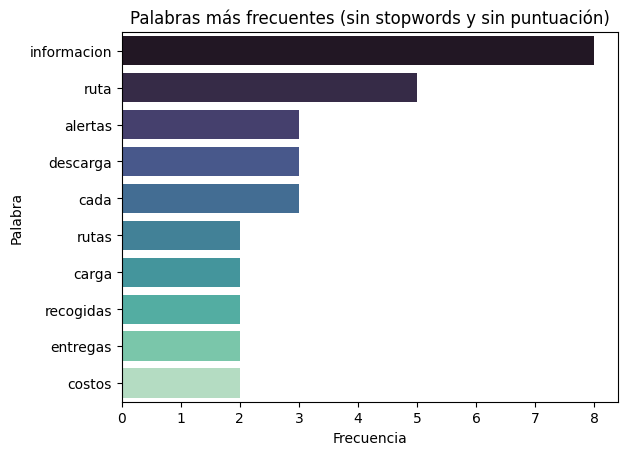

In [66]:
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata
import re

# Función para limpiar texto
def limpiar_texto(texto):
    # Eliminar tildes
    texto = unicodedata.normalize("NFKD", texto).encode("ASCII", "ignore").decode("utf-8")
    # Eliminar puntuación
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Texto de tu columna, convertir a minúsculas
text = ' '.join(df_trn_vd['Comentario']).lower()

# Limpiar texto
text = limpiar_texto(text)

# Lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

# Filtrar palabras
words = [word for word in text.split() if word not in stop_words]

# Contar frecuencia
counts = Counter(words)
top_words = pd.DataFrame(counts.most_common(10), columns=['word', 'count'])

# Gráfico
sns.barplot(data=top_words, x='count', y='word', palette='mako')
plt.title("Palabras más frecuentes (sin stopwords y sin puntuación)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()


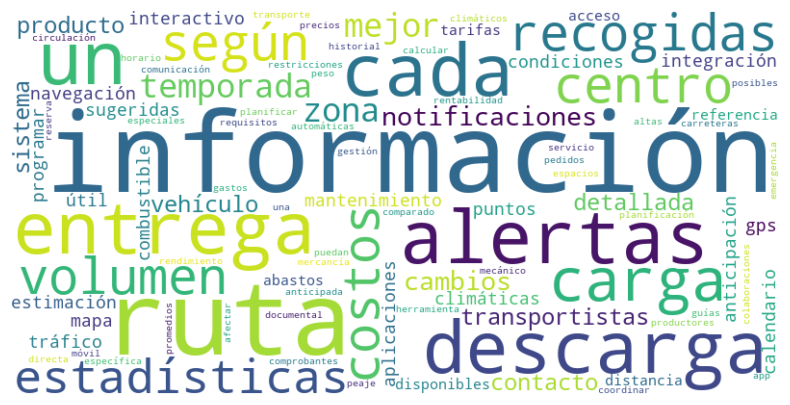

In [68]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### 3.Comerciante
Perfil: Comerciante

| Código | Tipo | Pregunta | Respuestas / Escala |
|--------|------|----------|---------------------|
| M1 | Demográfica | ¿Cuánto tiempo llevas operando en el Centro de Abastos? | 1=<1 año, 2=1–3 años, 3=3–5 años, 4=>5 años |
| M2 | Cerrada | ¿Conoces la página de Coomproriente con los reportes de precios? | 1=Sí, 2=No |
| M3 | Cerrada | Si "Sí" en M2: ¿Con qué fin principal la usas? | a) Ver precios b) Comparar proveedores c) Historial |
| M4 | Likert | ¿Qué tan actualizada está la información de precios y stock en ese reporte? | 1=Muy desactualizada → 5=Muy actualizada |
| M5 | Cerrada | ¿Has tenido que contactar por otro medio para confirmar o corregir precios? | 1=Sí, frecuentemente 2=Sí, ocasionalmente 3=No |
| M6 | Likert | Para tu negocio, ¿qué tan relevante sería un sistema de pedidos y facturación integrado en la web? | 1=Muy irrelevante → 5=Muy relevante |
| M7 | Cerrada | ¿Estarías dispuesto(a) a pagar una suscripción o comisión por usar un e-commerce que te ahorre tiempo? | 1=Sí, 2=No |
| M8 | Abierta | ¿Qué otros servicios (alertas de variación de precio, reportes descargables, facturación automática) te gustaría tener? | Respuesta libre |

In [45]:
df_com = pd.read_csv('../respuestas-cuestionario-comerciante.csv', quotechar='"', skipinitialspace=True, engine='python')

# Separar la columna combinada
df_com = df_com.iloc[:, 0].str.extract(
    r'^([^,]+),(\d|-),(\d|-),([abc-]),(\d|-),(\d|-),(\d|-),(\d|-),"?(.*?)"?$'
)
df_com.columns = ['Nombre', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'Comentario']

# Convertir las columnas numéricas
cols = ['M1', 'M2', 'M4', 'M5', 'M6', 'M7']
df_com[cols] = df_com[cols].replace('-', pd.NA).apply(pd.to_numeric)

df_com.head()

,Nombre,M1,M2,M3,M4,M5,M6,M7,Comentario
0,Marta Díaz,2,1,a,4.0,2,5,1,Alertas de variación de precios para productos...
1,Juan Pérez,3,2,-,NaN,1,4,1,Reportes descargables en formatos Excel o PDF.
2,Camila Rodríguez,4,1,b,5.0,1,5,1,Facturación automática y gestión de inventario.
3,Andrés Gómez,1,2,-,NaN,2,3,2,Integración con sistemas contables existentes.
4,Carolina López,2,1,a,3.0,2,4,1,Soporte en línea para resolver dudas rápidamente.


In [46]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nombre      48 non-null     object 
 1   M1          48 non-null     int64  
 2   M2          48 non-null     int64  
 3   M3          48 non-null     object 
 4   M4          28 non-null     float64
 5   M5          48 non-null     int64  
 6   M6          48 non-null     int64  
 7   M7          48 non-null     int64  
 8   Comentario  48 non-null     object 
dtypes: float64(1), int64(5), object(3)
memory usage: 3.5+ KB


In [47]:
M1_dict={1:'<1 año', 2:'1–3 años', 3:'3–5 años', 4:'4:5 años'}
M2_dict={1:'sí', 2:'no'}
df_com['M1']=df_com['M1'].map(M1_dict)
df_com['M2']=df_com['M2'].map(M2_dict)

#### M1.Visualizacion de estancia en la empresa

Text(0.5, 1.0, 'Tiempo de vinculacion de Comerciantes con la empresa')

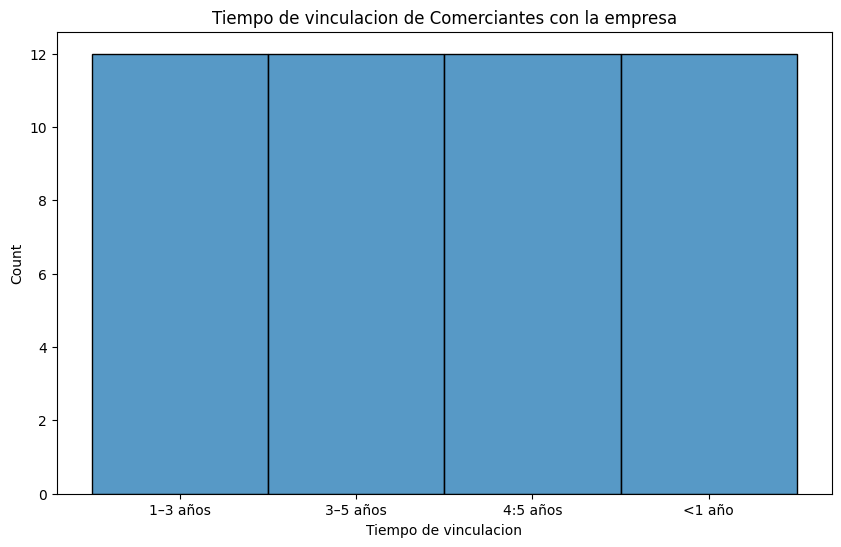

In [48]:

plt.figure(figsize=(10, 6))
sns.histplot(df_com['M1'].dropna(), bins=10)
plt.xlabel('Tiempo de vinculacion')
plt.title('Tiempo de vinculacion de Comerciantes con la empresa')

Text(0.5, 1.0, 'Conocimiento de la pagina de la empresa')

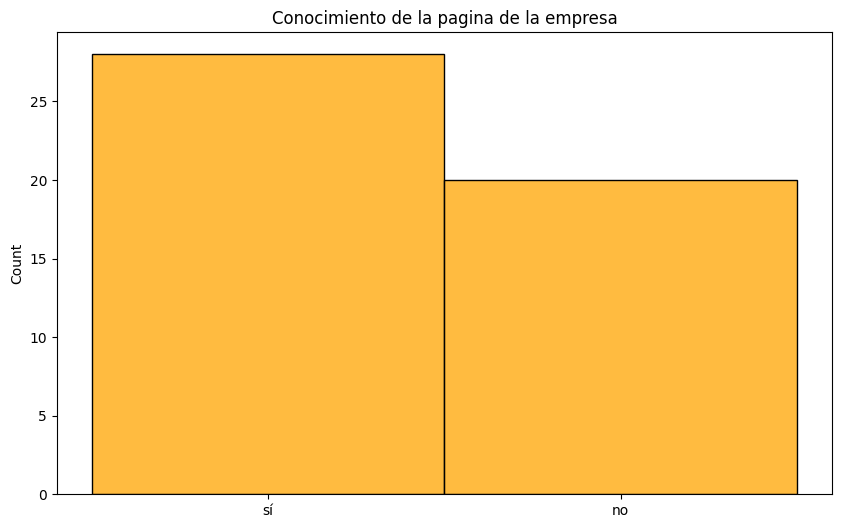

In [49]:
# Conocimiento con la empresa

plt.figure(figsize=(10, 6))
sns.histplot(df_com['M2'].dropna(), bins=10,color='orange')
plt.xlabel('')
plt.title('Conocimiento de la pagina de la empresa')

In [50]:
# Seleccion de opiniones de la gente que conoce la pagina

df_com_vd=df_com[df_com['M2']=='sí']
df_com_vd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 0 to 47
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nombre      28 non-null     object 
 1   M1          28 non-null     object 
 2   M2          28 non-null     object 
 3   M3          28 non-null     object 
 4   M4          28 non-null     float64
 5   M5          28 non-null     int64  
 6   M6          28 non-null     int64  
 7   M7          28 non-null     int64  
 8   Comentario  28 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.2+ KB


#### M3. Para que la usan

In [51]:
M3_dict={'a':'Ver Precios', 'b':'Comparar Proovedores', 'c':'Historial'}
df_com_vd['M3']=df_com_vd['M3'].map(M3_dict)

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\1841188507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_vd['M3']=df_com_vd['M3'].map(M3_dict)


In [52]:
df_com_vd['M3'].value_counts()

M3
Ver Precios             10
Comparar Proovedores     9
Historial                9
Name: count, dtype: int64

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\2050820360.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_com_vd['M3'].dropna(), bins=10, palette='')


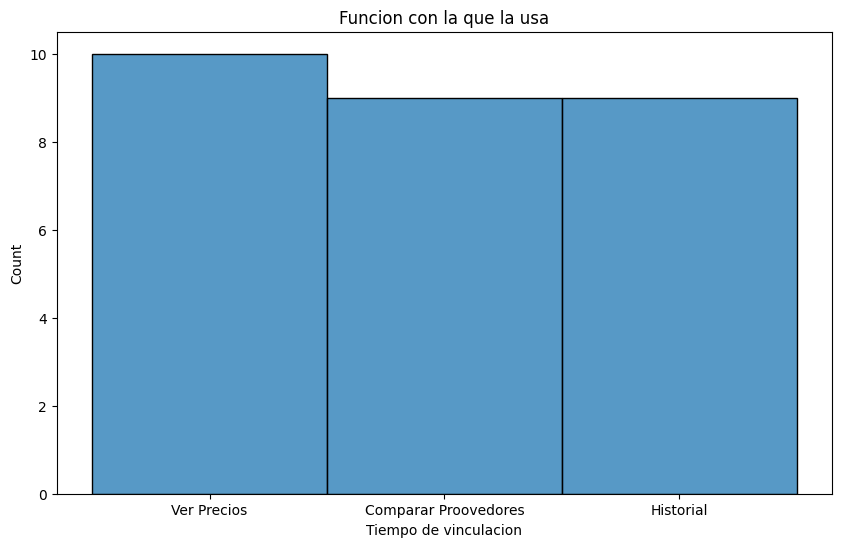

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df_com_vd['M3'].dropna(), bins=10, palette='')
plt.xlabel('Tiempo de vinculacion')
plt.title('Funcion con la que la usa')
sns.set_palette("Blues")

#### M4. ¿Que tan actualizada esta la pagina?

In [54]:
M4_dict={1:'Muy desactualizada', 2:'Desactualizada', 3:'Normal', 4:'Actualizada',5:'Muy actualizada'}
df_com_vd['M4']=df_com_vd['M4'].map(M4_dict)
df_com_vd['M4'].value_counts()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\1745572958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_vd['M4']=df_com_vd['M4'].map(M4_dict)


M4
Actualizada        10
Muy actualizada     9
Normal              9
Name: count, dtype: int64

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\4262514938.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_com_vd['M4'].dropna(), bins=10, palette='')


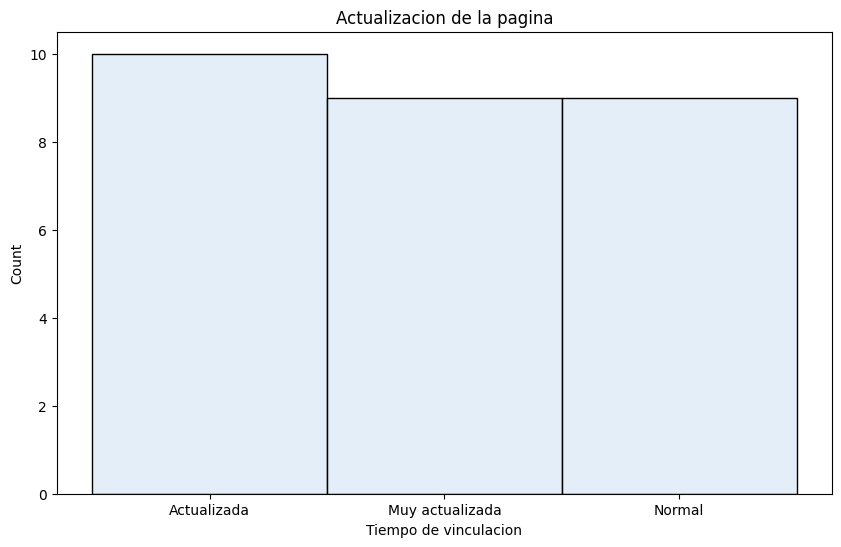

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df_com_vd['M4'].dropna(), bins=10, palette='')
plt.xlabel('Tiempo de vinculacion')
plt.title('Actualizacion de la pagina')
sns.set_palette("Oranges")

#### M5. Contactar otro medio para confirmar o corregir precios

In [56]:
M5_dict={1:'si,frecuentemente',2:'si,ocasionalmente',3:'no'}
df_com_vd['M5']=df_com_vd['M5'].map(M5_dict)

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\418583671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_vd['M5']=df_com_vd['M5'].map(M5_dict)


In [57]:
df_com_vd['M5'].value_counts()

M5
si,frecuentemente    17
si,ocasionalmente    11
Name: count, dtype: int64

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\2127697061.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_com_vd['M5'].dropna(), bins=10, palette='')


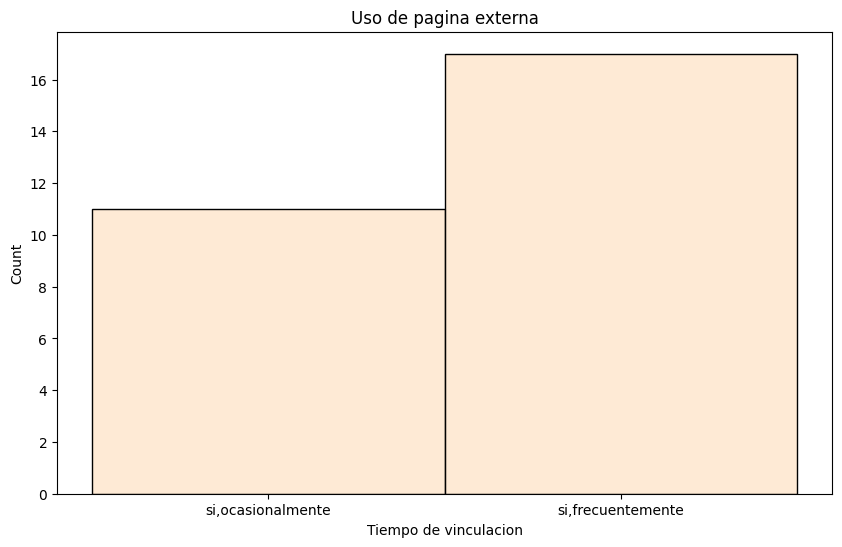

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df_com_vd['M5'].dropna(), bins=10, palette='')
plt.xlabel('Tiempo de vinculacion')
plt.title('Uso de pagina externa')
sns.set_palette("Oranges")

#### Relevancia de un sistema de pedidos


In [59]:
M6_dict={1:'Muy irrelevante',2:'irrelevante',3:'Normal',4:'relevante',5:'muy relevante'}
df_com_vd['M6']=df_com_vd['M6'].map(M6_dict)
df_com_vd['M6'].value_counts()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\2502702462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_vd['M6']=df_com_vd['M6'].map(M6_dict)


M6
muy relevante    20
relevante         6
Normal            2
Name: count, dtype: int64

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\2440340045.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_com_vd['M6'].dropna(), bins=10, palette="coolwarm")


Text(0.5, 1.0, 'Importancia sistema de pedididos para comerciantes')

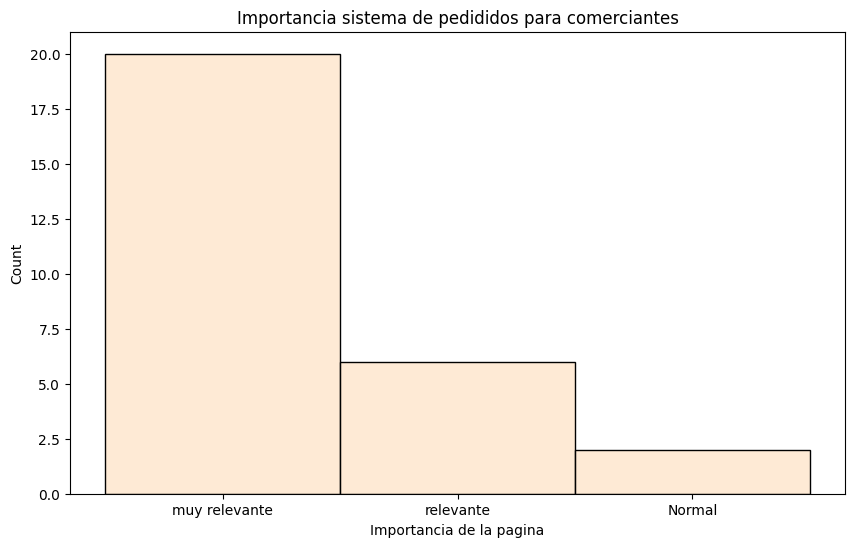

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df_com_vd['M6'].dropna(), bins=10, palette="coolwarm")
plt.xlabel('Importancia de la pagina')
plt.title('Importancia sistema de pedididos para comerciantes')


#### Disposicion a pagar una suscripcion

In [61]:
M7_dict={1:'si',2:'no'}
df_com_vd['M7']=df_com_vd['M7'].map(M7_dict)
df_com_vd['M7'].value_counts()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\509785103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_vd['M7']=df_com_vd['M7'].map(M7_dict)


M7
si    26
no     2
Name: count, dtype: int64

C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\2994411192.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_com_vd['M7'].dropna(), bins=10, palette="coolwarm")


Text(0.5, 1.0, 'Postura de pago de suscripcion para comerciantes')

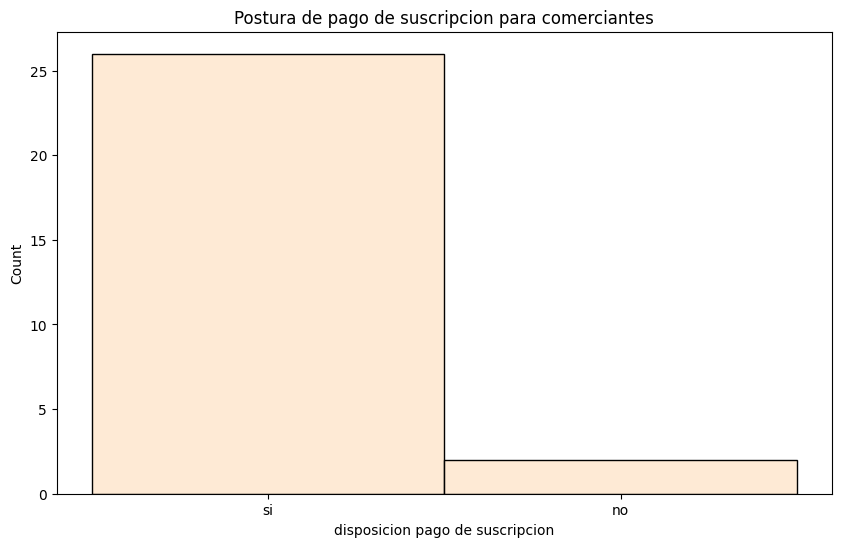

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(df_com_vd['M7'].dropna(), bins=10, palette="coolwarm")
plt.xlabel('disposicion pago de suscripcion')
plt.title('Postura de pago de suscripcion para comerciantes')

#### ¿Que otros servicios les gustaria que tuviera la pagina?

In [63]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\SANTI\AppData\Local\Temp\ipykernel_21356\1508090291.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x='count', y='word', palette='mako')


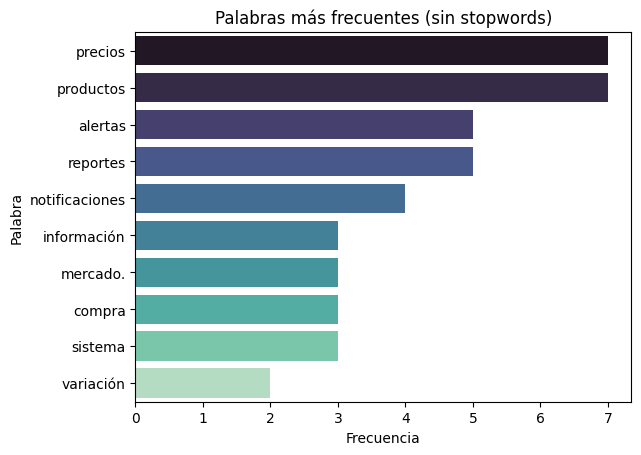

In [64]:
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Texto de tu columna
text = ' '.join(df_com_vd['Comentario']).lower()

# Lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

# Filtrar palabras
words = [word for word in text.split() if word not in stop_words]

# Contar frecuencia
counts = Counter(words)
top_words = pd.DataFrame(counts.most_common(10), columns=['word', 'count'])

# Gráfico
sns.barplot(data=top_words, x='count', y='word', palette='mako')
plt.title("Palabras más frecuentes (sin stopwords)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()


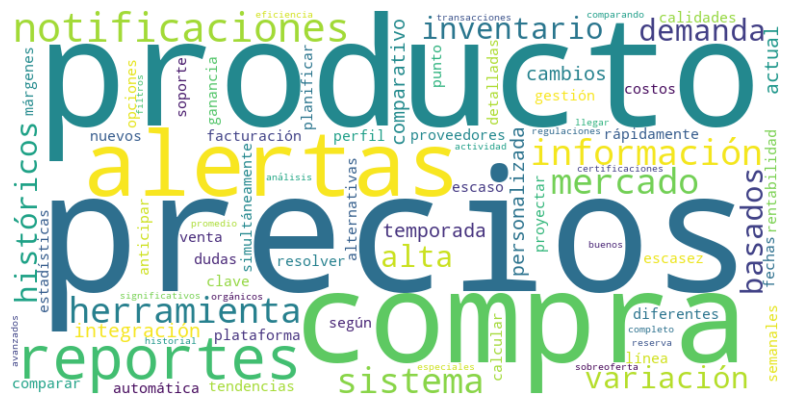

In [65]:
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Texto de tu columna
text = ' '.join(df_com_vd['Comentario']).lower()

# Lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

# Filtrar palabras
words = [word for word in text.split() if word not in stop_words]

# Contar frecuencia
counts = Counter(words)
top_words = pd.DataFrame(counts.most_common(10), columns=['word', 'count'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

